# 데이터 불러오기

In [66]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [67]:
rating_data = pd.read_csv('./data/ml-latest-small/ratings.csv')
movie_data = pd.read_csv('./data/ml-latest-small/movies.csv')

In [68]:
rating_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [69]:
movie_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [70]:
print(movie_data.shape)
print(rating_data.shape)

(9125, 3)
(100004, 4)


# Time-User DataFrame

In [71]:
time_user=rating_data
time_user

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [72]:
from datetime import datetime

time_user=rating_data
time_user.drop('movieId', axis = 1, inplace = True)
time_user.drop('rating', axis = 1, inplace = True)
time_user['Hour_6']=[datetime.fromtimestamp(x).strftime('%H') for x in time_user['timestamp']]
time_user.drop('timestamp', axis = 1, inplace = True)
time_user = time_user.reindex(columns=['Hour_6','userId'])
time_user = time_user.sort_values(by='Hour_6')
time_user.head()

,Hour_6,userId
100003,00,671
43614,00,311
85514,00,574
85513,00,574
85512,00,574


In [73]:
time_user.loc[(time_user['Hour_6']=="00") | (time_user["Hour_6"]=="01") | 
       (time_user["Hour_6"]=="02") | (time_user["Hour_6"]=="03"),"Hour_6"] = "h1"
time_user.loc[(time_user['Hour_6']=="04") | (time_user["Hour_6"]=="05") | 
       (time_user["Hour_6"]=="06") | (time_user["Hour_6"]=="07"),"Hour_6"] = "h2"
time_user.loc[(time_user['Hour_6']=="08") | (time_user["Hour_6"]=="09") | 
       (time_user["Hour_6"]=="10") | (time_user["Hour_6"]=="11"),"Hour_6"] = "h3"
time_user.loc[(time_user['Hour_6']=="12") | (time_user["Hour_6"]=="13") | 
       (time_user["Hour_6"]=="14") | (time_user["Hour_6"]=="15"),"Hour_6"] = "h4"
time_user.loc[(time_user['Hour_6']=="16") | (time_user["Hour_6"]=="17") | 
       (time_user["Hour_6"]=="18") | (time_user["Hour_6"]=="19"),"Hour_6"] = "h5"
time_user.loc[(time_user['Hour_6']=="20") | (time_user["Hour_6"]=="21") | 
       (time_user["Hour_6"]=="22") | (time_user["Hour_6"]=="23"),"Hour_6"] = "h6"

In [74]:
#drop_duplicates이 함수가 알고보니까 중복을 제거해주는게 아니라 중복인 부분을 출력해주는 함수 였음..
time_user=time_user.drop_duplicates(['Hour_6','userId'], keep='first', ignore_index='True')

In [75]:
#여기서 우선 시간&유저아이디 모두 중복인거 출력
time_user

,Hour_6,userId
0,h1,671
1,h1,311
2,h1,574
3,h1,299
4,h1,382
...,...,...
1323,h6,283
1324,h6,556
1325,h6,572
1326,h6,271


In [76]:
#여기서 다시 위의 데이터 중에서 유저가 중복인거를 제거
#근데 이러면 문제점이 만약 중복이 없는 데이터면 여기서 출력이 안됨..(우리 데이터는 모든 유저가 중복데이터가 있었어)
#그리고 무조건 한 타임(Ex)h1)에만 알림을 보낼 수 있어
time_user=time_user.drop_duplicates(['userId'], keep='first', ignore_index='True')

In [77]:
time_user = time_user.sort_values(by='userId')

In [78]:
time_user

,Hour_6,userId
472,h3,1
614,h6,2
297,h2,3
223,h1,4
407,h3,5
...,...,...
594,h5,667
507,h4,668
550,h4,669
630,h6,670


# 전처리

In [79]:
rating_data = pd.read_csv('./data/ml-latest-small/ratings.csv')
movie_data = pd.read_csv('./data/ml-latest-small/movies.csv')

In [80]:
rating_data.drop('timestamp', axis = 1, inplace = True)
rating_data.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [81]:
movie_data.drop('genres', axis = 1, inplace = True)
movie_data.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [82]:
user_movie_data = pd.merge(rating_data, movie_data, on = 'movieId')
user_movie_data.head()

,userId,movieId,rating,title
0,1,31,2.5,Dangerous Minds (1995)
1,7,31,3.0,Dangerous Minds (1995)
2,31,31,4.0,Dangerous Minds (1995)
3,32,31,4.0,Dangerous Minds (1995)
4,36,31,3.0,Dangerous Minds (1995)


In [83]:
user_movie_data.shape

(100004, 4)

불필요한 컬럼을 제거한 뒤 pandas의 merge를 이용해서 하나로 합쳤습니다.   

이제, pivot_table을 만들어줍니다.   

value에는 rating값을, column에는 movie title 값을, index는 user id를 넣어줍니다.

In [84]:
user_movie_rating = user_movie_data.pivot_table('rating', index = 'userId', columns='title').fillna(0)

In [85]:
user_movie_rating.shape

(671, 9064)

In [86]:
user_movie_rating.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


자! 이제 사용자-영화 데이터의 pivot table을 만들었습니다.  

이제 사용자-영화 기준의 데이터를 **영화-사용자** 기준으로 만들어서 특정 '영화'와 비슷한 영화를 추천해주는 로직을 구현해봅니다.


In [87]:
movie_user_rating = user_movie_rating.values.T
movie_user_rating.shape

(9064, 671)

In [88]:
type(movie_user_rating)

numpy.ndarray

In [89]:
SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(movie_user_rating)
matrix.shape

(9064, 12)

In [90]:
matrix[0]

array([ 0.01227491,  0.00250735,  0.01554738, -0.03395262, -0.01446263,
        0.00342057, -0.00235159,  0.04424871, -0.01683687, -0.02026624,
        0.01127856, -0.007714  ])

12개의 component로 차원을 축소했습니다. 

이제 이렇게 나온 데이터를 활용해서 피어슨 상관계수를 구합니다.

In [91]:
corr = np.corrcoef(matrix)
corr.shape

(9064, 9064)

In [92]:
corr2 = corr[:200, :200]
corr2.shape

(200, 200)

<AxesSubplot:>

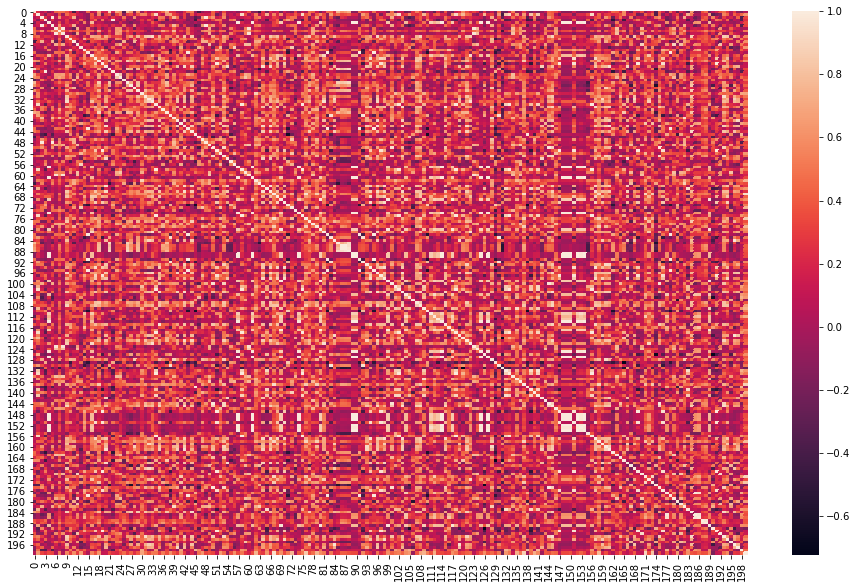

In [93]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr2)

이렇게 나온 상관계수를 이용해서 특정 영화와 상관계수가 높은 영화를 뽑아줍니다.

In [94]:
movie_title = user_movie_rating.columns
movie_title_list = list(movie_title)
coffey_hands = movie_title_list.index("Guardians of the Galaxy (2014)")

In [95]:
corr_coffey_hands  = corr[coffey_hands]
list(movie_title[(corr_coffey_hands >= 0.9)])[:50]

['10,000 BC (2008)',
 '2 Guns (2013)',
 '2012 (2009)',
 '21 (2008)',
 '300: Rise of an Empire (2014)',
 'Abduction (2011)',
 'Adjustment Bureau, The (2011)',
 'Adventures of Tintin, The (2011)',
 'Alice in Wonderland (2010)',
 'Amazing Spider-Man, The (2012)',
 'Angels & Demons (2009)',
 'Ant-Man (2015)',
 'Avatar (2009)',
 'Avengers, The (2012)',
 'Avengers: Age of Ultron (2015)',
 'Batman: The Dark Knight Returns, Part 1 (2012)',
 'Batman: The Dark Knight Returns, Part 2 (2013)',
 'Battle: Los Angeles (2011)',
 'Bee Movie (2007)',
 'Beowulf (2007)',
 'Big Hero 6 (2014)',
 'Bolt (2008)',
 'Brave (2012)',
 'Captain America: Civil War (2016)',
 'Captain America: The First Avenger (2011)',
 'Captain America: The Winter Soldier (2014)',
 'Chronicle (2012)',
 'Click (2006)',
 'Cloverfield (2008)',
 'Cop Out (2010)',
 'Dark Knight Rises, The (2012)',
 'Diary of a Wimpy Kid (2010)',
 'District 9 (2009)',
 'Dredd (2012)',
 'Drillbit Taylor (2008)',
 'Déjà Vu (Deja Vu) (2006)',
 'Edge of Tomor

# 한 사용자에게 개인 추천을 해주기

In [96]:
df_ratings  = pd.read_csv('./data/ml-latest-small/ratings.csv')
df_movies  = pd.read_csv('./data/ml-latest-small/movies.csv')

In [97]:
df_user_movie_ratings = df_ratings.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)

In [98]:
df_user_movie_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
# matrix는 pivot_table 값을 numpy matrix로 만든 것 
matrix = df_user_movie_ratings.to_numpy()

# user_ratings_mean은 사용자의 평균 평점 
user_ratings_mean = np.mean(matrix, axis = 1)

# R_user_mean : 사용자-영화에 대해 사용자 평균 평점을 뺀 것.
matrix_user_mean = matrix - user_ratings_mean.reshape(-1, 1)

In [100]:
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

In [101]:
matrix.shape

(671, 9066)

In [102]:
user_ratings_mean.shape

(671,)

In [103]:
matrix_user_mean.shape

(671, 9066)

In [104]:
pd.DataFrame(matrix_user_mean, columns = df_user_movie_ratings.columns).head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,...,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625
1,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,3.970770,...,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230
2,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,...,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075
3,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,3.902162,...,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838
4,-0.043128,-0.043128,3.956872,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,...,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128


In [105]:
# scipy에서 제공해주는 svd.  
# U 행렬, sigma 행렬, V 전치 행렬을 반환.

U, sigma, Vt = svds(matrix_user_mean, k = 12)

In [106]:
print(U.shape)
print(sigma.shape)
print(Vt.shape)

(671, 12)
(12,)
(12, 9066)


In [107]:
sigma = np.diag(sigma)

In [108]:
sigma.shape

(12, 12)

In [109]:
sigma[0]

array([105.72437051,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])

In [110]:
sigma[1]

array([  0.        , 110.15522471,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])

In [111]:
# U, Sigma, Vt의 내적을 수행하면, 다시 원본 행렬로 복원이 된다. 
# 거기에 + 사용자 평균 rating을 적용한다. 
svd_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [112]:
df_svd_preds = pd.DataFrame(svd_user_predicted_ratings, columns = df_user_movie_ratings.columns)
df_svd_preds.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,-0.079686,0.021779,-0.013837,-0.005870,-0.028877,0.032371,0.000715,-0.004428,-0.005219,0.038195,...,-0.004324,-0.004352,0.010478,-0.004256,-0.003944,-0.005674,0.018157,-0.005575,-0.005297,-0.003766
1,1.428452,1.608841,0.529476,0.168278,0.520809,1.107473,0.529719,0.089376,0.296270,1.970031,...,0.013227,-0.002275,0.020680,-0.005245,-0.007644,-0.021019,0.031243,-0.000957,-0.000753,0.026901
2,0.977246,0.396971,0.000299,0.027444,0.021287,0.141458,-0.057134,0.031633,-0.012538,0.383576,...,0.002761,0.004907,-0.014190,-0.000251,-0.006007,-0.003189,-0.026916,0.014637,0.013287,-0.005741
3,1.870844,1.169993,0.252202,0.094831,-0.181713,-0.511953,-0.027820,-0.143080,0.013247,1.461694,...,0.026412,-0.027245,0.054681,0.018450,0.034544,-0.035740,0.088889,-0.019365,-0.017113,0.066559
4,1.182777,0.924903,0.075998,0.061505,0.602680,-0.159825,0.339925,0.081534,-0.079666,0.535018,...,-0.029124,-0.029357,0.009064,-0.029092,-0.030890,-0.057453,0.026344,-0.024027,-0.024614,-0.032752


In [113]:
df_svd_preds.shape

(671, 9066)

In [114]:
def recommend_movies(df_svd_preds, user_id, ori_movies_df, ori_ratings_df, num_recommendations=5):
    
    #현재는 index로 적용이 되어있으므로 user_id - 1을 해야함.
    user_row_number = user_id - 1 
    
    # 최종적으로 만든 pred_df에서 사용자 index에 따라 영화 데이터 정렬 -> 영화 평점이 높은 순으로 정렬 됌
    sorted_user_predictions = df_svd_preds.iloc[user_row_number].sort_values(ascending=False)
    
    # 원본 평점 데이터에서 user id에 해당하는 데이터를 뽑아낸다. 
    user_data = ori_ratings_df[ori_ratings_df.userId == user_id]
    
    # 위에서 뽑은 user_data와 원본 영화 데이터를 합친다. 
    user_history = user_data.merge(ori_movies_df, on = 'movieId').sort_values(['rating'], ascending=False)
    
    # 원본 영화 데이터에서 사용자가 본 영화 데이터를 제외한 데이터를 추출
    recommendations = ori_movies_df[~ori_movies_df['movieId'].isin(user_history['movieId'])]
    # 사용자의 영화 평점이 높은 순으로 정렬된 데이터와 위 recommendations을 합친다. 
    recommendations = recommendations.merge( pd.DataFrame(sorted_user_predictions).reset_index(), on = 'movieId')
    # 컬럼 이름 바꾸고 정렬해서 return
    recommendations = recommendations.rename(columns = {user_row_number: 'Predictions'}).sort_values('Predictions', ascending = False).iloc[:num_recommendations, :]
                      

    return user_history, recommendations

In [115]:
already_rated, predictions = recommend_movies(df_svd_preds, 330, df_movies, df_ratings, 10)

In [116]:
already_rated.head(10)

,userId,movieId,rating,timestamp,title,genres
47,330,1094,5.0,948577200,"Crying Game, The (1992)",Drama|Romance|Thriller
14,330,213,5.0,948577039,Burnt by the Sun (Utomlyonnye solntsem) (1994),Drama
34,330,527,5.0,948577164,Schindler's List (1993),Drama|War
45,330,1035,5.0,948574126,"Sound of Music, The (1965)",Musical|Romance
48,330,1172,5.0,948575236,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama
53,330,1249,5.0,948576522,"Femme Nikita, La (Nikita) (1990)",Action|Crime|Romance|Thriller
27,330,373,5.0,948576522,Red Rock West (1992),Thriller
58,330,1428,5.0,948731410,Angel Baby (1995),Drama
61,330,1575,5.0,948577442,Gabbeh (1996),Drama
67,330,1683,5.0,948578017,"Wings of the Dove, The (1997)",Drama|Romance


In [117]:
df = predictions[:5]
df

,movieId,title,genres,Predictions
246,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,2.060064
294,356,Forrest Gump (1994),Comedy|Drama|Romance|War,1.772814
497,608,Fargo (1996),Comedy|Crime|Drama|Thriller,1.526111
487,590,Dances with Wolves (1990),Adventure|Drama|Western,1.508960
316,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller,1.276646


In [118]:
title = df[['title']]

In [119]:
title.reset_index(drop=True)
title.rename(columns = {"title": 330}, inplace = True)
title

,330
246,Pulp Fiction (1994)
294,Forrest Gump (1994)
497,Fargo (1996)
487,Dances with Wolves (1990)
316,True Lies (1994)


In [120]:
dict_from_df = title.to_dict('list')
dict_from_df

{330: ['Pulp Fiction (1994)',
  'Forrest Gump (1994)',
  'Fargo (1996)',
  'Dances with Wolves (1990)',
  'True Lies (1994)']}

# User-Moive (상위 5개) DataFrame

In [121]:
user_title = {}
for i in range(1, rating_data['userId'].max()+1):
    already_rated, predictions = recommend_movies(df_svd_preds, i, df_movies, df_ratings, 10)
    df = predictions[:5]
    title = df[['title']]
    #title.drop(index='userId')
    title.reset_index(drop=True)
    title.rename(columns = {"title": i}, inplace = True)
    dict_from_df = title.to_dict('list')
    user_title.update(dict_from_df)

#print(user_title)

In [122]:
user_movie = pd.DataFrame(user_title)
user_movie

,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
0,Jaws (1975),"Shawshank Redemption, The (1994)","Matrix, The (1999)",Monty Python's Life of Brian (1979),"Shawshank Redemption, The (1994)",Monty Python and the Holy Grail (1975),Pulp Fiction (1994),Shrek (2001),Pulp Fiction (1994),Star Wars: Episode IV - A New Hope (1977),...,Dances with Wolves (1990),"Shawshank Redemption, The (1994)",WALL·E (2008),Toy Story 2 (1999),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)","Usual Suspects, The (1995)",Star Wars: Episode V - The Empire Strikes Back...,Pulp Fiction (1994),Back to the Future (1985)
1,Alien (1979),True Lies (1994),"Usual Suspects, The (1995)",Beauty and the Beast (1991),Good Will Hunting (1997),"Lord of the Rings: The Fellowship of the Ring,...","Silence of the Lambs, The (1991)",Pirates of the Caribbean: The Curse of the Bla...,Forrest Gump (1994),Back to the Future (1985),...,"Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode III - Revenge of the Sith (...,"Sixth Sense, The (1999)",True Lies (1994),"Shawshank Redemption, The (1994)",Schindler's List (1993),American Beauty (1999),Forrest Gump (1994),"Lord of the Rings: The Return of the King, The..."
2,Chinatown (1974),Beauty and the Beast (1991),"Lord of the Rings: The Fellowship of the Ring,...",Batman (1989),Catch Me If You Can (2002),"Princess Bride, The (1987)","Fugitive, The (1993)",Men in Black (a.k.a. MIB) (1997),Star Wars: Episode IV - A New Hope (1977),Terminator 2: Judgment Day (1991),...,Braveheart (1995),Pulp Fiction (1994),"Truman Show, The (1998)","Princess Bride, The (1987)","Lion King, The (1994)",Seven (a.k.a. Se7en) (1995),Forrest Gump (1994),Raiders of the Lost Ark (Indiana Jones and the...,Star Wars: Episode IV - A New Hope (1977),"Godfather, The (1972)"
3,Blade Runner (1982),Ace Ventura: Pet Detective (1994),Seven (a.k.a. Se7en) (1995),"Nightmare Before Christmas, The (1993)","Monsters, Inc. (2001)",American Beauty (1999),Fargo (1996),"Terminator, The (1984)",American Beauty (1999),"Godfather, The (1972)",...,Batman (1989),Star Wars: Episode V - The Empire Strikes Back...,Ratatouille (2007),"Breakfast Club, The (1985)",Seven (a.k.a. Se7en) (1995),Terminator 2: Judgment Day (1991),American Beauty (1999),"Matrix, The (1999)",Terminator 2: Judgment Day (1991),Schindler's List (1993)
4,Fantasia (1940),Pretty Woman (1990),Jurassic Park (1993),"Silence of the Lambs, The (1991)","Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Star Wars: Episode V - The Empire Strikes Back...,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Toy Story (1995),"Usual Suspects, The (1995)",Saving Private Ryan (1998),...,Clear and Present Danger (1994),Raiders of the Lost Ark (Indiana Jones and the...,"Beautiful Mind, A (2001)","Bug's Life, A (1998)",Speed (1994),"Usual Suspects, The (1995)","Godfather, The (1972)","Princess Bride, The (1987)",Jurassic Park (1993),"Silence of the Lambs, The (1991)"


In [123]:
user_movie = pd.DataFrame(list(user_title.items()),columns =['userId','title'])
user_movie

,userId,title
0,1,"[Jaws (1975), Alien (1979), Chinatown (1974), ..."
1,2,"[Shawshank Redemption, The (1994), True Lies (..."
2,3,"[Matrix, The (1999), Usual Suspects, The (1995..."
3,4,"[Monty Python's Life of Brian (1979), Beauty a..."
4,5,"[Shawshank Redemption, The (1994), Good Will H..."
...,...,...
666,667,"[Silence of the Lambs, The (1991), Shawshank R..."
667,668,"[Usual Suspects, The (1995), Schindler's List ..."
668,669,[Star Wars: Episode V - The Empire Strikes Bac...
669,670,"[Pulp Fiction (1994), Forrest Gump (1994), Sta..."


# Time-User & User-Movie DataFrame Merge

In [124]:
time_user_movie=pd.merge(time_user,user_movie,on='userId')

In [125]:
time_user_movie

,Hour_6,userId,title
0,h3,1,"[Jaws (1975), Alien (1979), Chinatown (1974), ..."
1,h6,2,"[Shawshank Redemption, The (1994), True Lies (..."
2,h2,3,"[Matrix, The (1999), Usual Suspects, The (1995..."
3,h1,4,"[Monty Python's Life of Brian (1979), Beauty a..."
4,h3,5,"[Shawshank Redemption, The (1994), Good Will H..."
...,...,...,...
666,h5,667,"[Silence of the Lambs, The (1991), Shawshank R..."
667,h4,668,"[Usual Suspects, The (1995), Schindler's List ..."
668,h4,669,[Star Wars: Episode V - The Empire Strikes Bac...
669,h6,670,"[Pulp Fiction (1994), Forrest Gump (1994), Sta..."


In [126]:
time_user_movie.sort_values(by='Hour_6', ignore_index='True')

,Hour_6,userId,title
0,h1,336,"[Shawshank Redemption, The (1994), Raiders of ..."
1,h1,371,"[Dark Knight, The (2008), Schindler's List (19..."
2,h1,369,"[Silence of the Lambs, The (1991), Dumb & Dumb..."
3,h1,367,[Star Wars: Episode VI - Return of the Jedi (1...
4,h1,365,"[Lord of the Rings: The Two Towers, The (2002)..."
...,...,...,...
666,h6,18,"[Toy Story (1995), Star Trek: First Contact (1..."
667,h6,67,"[Apollo 13 (1995), True Lies (1994), Aladdin (..."
668,h6,126,"[Pulp Fiction (1994), Braveheart (1995), Die H..."
669,h6,611,[Lord of the Rings: The Fellowship of the Ring...
